In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import subplot

def linear_regression_cost_function(X, y, theta, lamb=0,derivative=False):
    # Compute cost and gradient for regularized linear regression with multiple variables
    #   computes the cost of using theta as the parameter for linear regression to fit the 
    #    data points in X and y. Returns the cost in J and the gradient in grad

    # Initialize some useful values
    m = len(y) # number of training examples

    h = np.dot(X,theta)
    if derivative == False:
        # calculate the cost
        J = np.dot((h.T-y), (h.T-y).T) / (2*m) + lamb/(2*m) * np.dot(theta[1:].transpose(), theta[1:])
        return(J)
    else:
        # calculate the derivative 
        grad = np.dot((h.T-y),X) / m
        grad[1:] += lamb/m * theta[1:]#.transpose()
        grad = grad.T
        return(grad)


def gradientDescent(X, y, theta, alpha, num_iters, lamb=0):
    # Performs gradient descent to learn theta
    # updates theta by taking num_iters gradient steps with learning rate alpha

    # Initialize some useful values
    m = len(y) # number of training examples
    J_history = [0 for i in range(num_iters)]

    for iter in range(num_iters):

        # Perform a single gradient step on the parameter vector theta. 
        delta = linear_regression_cost_function(X, y, theta, lamb, derivative=True)
        theta = theta - alpha * delta

        # Save the cost J in every iteration    
        J_history[iter] = linear_regression_cost_function(X, y, theta)[0]

    return(theta, J_history)

def train_linear_regression(X, y, lamb, alpha, num_iters=200):
    # Trains linear regression given a dataset (X, y) and a
    # regularization parameter lamb
    #   trains linear regression using the dataset (X, y) and regularization parameter 
    #   lamb. Returns the trained parameters theta.
    
    # add a column of ones to the left of X
    ones = np.array([1 for i in range(len(X))])
    oneX = np.column_stack((ones,X))
    
    # Initialize Theta
    initial_theta = np.array([[0] for i in range(oneX.shape[1])])
    
    # Minimize using gradient descent
    [theta,J_hist] = gradientDescent(oneX, y, initial_theta, alpha, num_iters)

    return(theta,J_hist)

In [2]:
m = 100 # number of points
n = 2 # dimension

# create some random points
np.random.seed(1) # for reproducibility
X = np.array( [[ np.random.random() for i in range(n) ] for i in range(m)] ) # create m randomo points in n dimensions
M = np.array([[1,5],[0,1]]) # a linear transformation in 2 dimensions
MX = np.dot(X,M) # multiply the matrix to transform the points

X = MX[:,0]
y = MX[:,1]
lamb = 0
alpha = .01
num_iters = 10000

[w,jh] = train_linear_regression(X, y, lamb, alpha, num_iters)

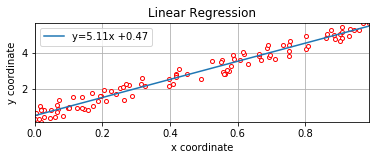

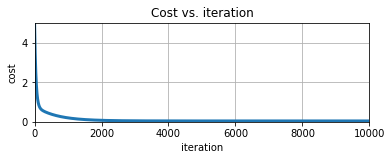

In [3]:
# let's see how our points look like
subplot(2,1,1)
p = plt.plot(MX[:,0],MX[:,1], 'ro')
plt.setp(p, markersize=4)
plt.setp(p, markerfacecolor='white')
xmin = min(MX[:,0])
xmax = max(MX[:,0])
ymin = min(MX[:,1])
ymax = max(MX[:,1])
plot_x = np.linspace(xmin, xmax, 10000)
plot_y = w[0] + w[1] * plot_x
plt.plot(plot_x, plot_y, label='y=' + str(w[1][0])[:4] + 'x +' + str(w[0][0])[:4])
plt.legend()
plt.grid(True)
plt.title('Linear Regression')
plt.axis([xmin, xmax, ymin, ymax])
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.show()


subplot(2,1,2)
x = np.array([i for i in range(len(jh))])
y = np.array(jh)
plt.plot(x,y,lw=3)
plt.title('Cost vs. iteration')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.grid(True)
plt.axis([0, num_iters, 0, max(jh)])
plt.show()

